In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, accuracy_score
import seaborn as sns
# warnings.filterwarnings('ignore')


In [3]:
f1_dict = {}
precision_dict = {}
recall_dict = {}
accuracy_dict = {}
train_accuracy = {}
validation_accuracy = {}
test_accuracy = {}
time_dict ={}
tp_dict = {}
fp_dict = {}

In [4]:
df = pd.read_csv("data/sqli.csv", encoding='utf-16')
print("Data Shape:", df.shape)


Data Shape: (4200, 2)


In [5]:
X = df['Sentence']
y = df['Label']
print(X.shape, y.shape)

(4200,) (4200,)


In [6]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
nltk.download('stopwords')
vectorizer = CountVectorizer(min_df = 2, max_df = 0.8, stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(X.values.astype('U')).toarray()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\janha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3360, 4717)
(3360,)
(840, 4717)
(840,)


### 1. LOGISTIC REGRESSION

In [52]:
from sklearn.linear_model import LogisticRegression

In [8]:
lr_clf = LogisticRegression()
y_pred_lr = lr_clf.fit(X_train, y_train)
y_pred = y_pred_lr.predict(X_test)

In [9]:
# conf_matrix_model = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tp_dict["LogisticRegression"] = tp
fp_dict["LogisticRegression"] = fp
# conf_matrix_model[]

In [10]:
time_dict["LogisticRegression"] = 1.1

In [11]:
f1_dict["LogisticRegression"] = f1_score(y_pred, y_test)
precision_dict["LogisticRegression"] = precision_score(y_pred, y_test)
recall_dict["LogisticRegression"] = recall_score(y_pred, y_test)
accuracy_dict['LogisticRegression'] = accuracy_score(y_pred, y_test)

In [12]:
print(f"Accuracy of Logistic Regression on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of Logistic Regression on test set : {f1_score(y_pred, y_test)}")
print(f"precision_score of Logistic Regression on test set : {precision_score(y_pred, y_test)}")
print(f"recall_score of Logistic Regression on test set : {recall_score(y_pred, y_test)}")

Accuracy of Logistic Regression on test set : 0.9369047619047619
F1 Score of Logistic Regression on test set : 0.8555858310626703
precision_score of Logistic Regression on test set : 0.7548076923076923
recall_score of Logistic Regression on test set : 0.9874213836477987


### 2.NAIVE BAYES

In [13]:
from sklearn.naive_bayes import GaussianNB

In [14]:
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
y_pred = nb_clf.predict(X_test)

In [15]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tp_dict["NaiveBayes"] = tp
fp_dict["NaiveBayes"] = fp

In [16]:
time_dict["NaiveBayes"] = 0.6

In [17]:
f1_dict["NaiveBayes"] = f1_score(y_pred, y_test)
precision_dict["NaiveBayes"] = precision_score(y_pred, y_test)
recall_dict["NaiveBayes"] = recall_score(y_pred, y_test)
accuracy_dict['NaiveBayes'] = accuracy_score(y_pred, y_test)

In [18]:
print(f"Accuracy of Naive Bayes on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of Naive Bayes on test set : {f1_score(y_pred, y_test)}")
print(f"precision_score of Naive bayes on test set : {precision_score(y_pred, y_test)}")
print(f"recall_score of Naive Bayes on test set : {recall_score(y_pred, y_test)}")

Accuracy of Naive Bayes on test set : 0.9809523809523809
F1 Score of Naive Bayes on test set : 0.962962962962963
precision_score of Naive bayes on test set : 1.0
recall_score of Naive Bayes on test set : 0.9285714285714286


### 3. SVM

In [8]:
from sklearn.svm import SVC

In [9]:
svm_clf = SVC(gamma = 'auto')
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)

In [10]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tp_dict["SVM"] = tp
fp_dict["SVM"] = fp

In [11]:
f1_dict["SVM"] = f1_score(y_pred, y_test)
precision_dict["SVM"] = precision_score(y_pred, y_test)
recall_dict["SVM"] = recall_score(y_pred, y_test)
accuracy_dict['SVM'] = accuracy_score(y_pred, y_test)
time_dict['SVM'] = 36.1

In [12]:
print(f"Accuracy of SVM on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of SVM on test set : {f1_score(y_pred, y_test)}")
print(f"precision_score of SVM on test set : {precision_score(y_pred, y_test)}")
print(f"recall_score of SVM on test set : {recall_score(y_pred, y_test)}")

Accuracy of SVM on test set : 0.780952380952381
F1 Score of SVM on test set : 0.31343283582089554
precision_score of SVM on test set : 0.18584070796460178
recall_score of SVM on test set : 1.0


### 4.Decision Tree Classifier

In [13]:
from sklearn import tree

In [14]:
DT = tree.DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)

In [15]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tp_dict["DecisionTree"] = tp
fp_dict["DecisionTree"] = fp

In [16]:
f1_dict["DecisionTree"] = f1_score(y_pred, y_test)
precision_dict["DecisionTree"] = precision_score(y_pred, y_test)
recall_dict["DecisionTree"] = recall_score(y_pred, y_test)
accuracy_dict['DecisionTree'] = accuracy_score(y_pred, y_test)
time_dict["DecisionTree"] = 12.7

In [17]:
print(f"Accuracy of DTC on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of DTC on test set : {f1_score(y_pred, y_test)}")
print(f"precision_score of DTC on test set : {precision_score(y_pred, y_test)}")
print(f"recall_score of DTC on test set : {recall_score(y_pred, y_test)}")

Accuracy of DTC on test set : 0.8559523809523809
F1 Score of DTC on test set : 0.7888307155322862
precision_score of DTC on test set : 1.0
recall_score of DTC on test set : 0.6512968299711815


### 5.Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier


In [19]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

In [20]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tp_dict["RandomForest"] = tp
fp_dict["RandomForest"] = fp

In [21]:
f1_dict["RandomForest"] = f1_score(y_pred, y_test)
precision_dict["RandomForest"] = precision_score(y_pred, y_test)
recall_dict["RandomForest"] = recall_score(y_pred, y_test)
accuracy_dict['RandomForest'] = accuracy_score(y_pred, y_test)
time_dict["RandomForest"] = 15.7

In [22]:
print(f"Accuracy of RF on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of RF on test set : {f1_score(y_pred, y_test)}")
print(f"precision_score of RF on test set : {precision_score(y_pred, y_test)}")
print(f"recall_score of RF on test set : {recall_score(y_pred, y_test)}")

Accuracy of RF on test set : 0.9035714285714286
F1 Score of RF on test set : 0.8480300187617261
precision_score of RF on test set : 1.0
recall_score of RF on test set : 0.7361563517915309


### 6.Convolution Neural Network

In [23]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras import models, layers
# import warnings

from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import precision_recall_curve,precision_recall_fscore_support


In [24]:
# Function to plot the history graphs of the training and validation curves during training
def plot_history(history):
    history_dict = history.history
    train_loss = history_dict['loss']    # Training loss over epochs
    val_loss = history_dict['val_loss']    # Validation loss over epochs
    epochs = range(1, len(history_dict['loss'])+1)
    plt.plot(epochs, train_loss,'b', label='Training error')
    plt.plot(epochs, val_loss,'b', color="orange", label='Validation error')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def plot_historyAcc(history):
    history_dict = history.history
    train_acc = history_dict['accuracy']    # Training loss over epochs
    val_acc = history_dict['val_accuracy']    # Validation loss over epochs
    epochs = range(1, len(history_dict['accuracy'])+1)
    plt.plot(epochs, train_acc,'b', label='Training accuracy')
    plt.plot(epochs, val_acc,'b', color="orange", label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Function to plot the confusion matrix
def plot_confusion_matrix(conf_matrix):    
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
    
    plt.xlabel('Predicted Value', fontsize=18)
    plt.ylabel('Actual Value', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()

In [25]:
model = models.Sequential()
model.add(layers.Conv1D(32, 1, activation = 'relu', input_shape = (1,4717)))
model.add(layers.Conv1D(32, 1, activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation = 'sigmoid'))
model.summary()
model.compile(optimizer = 'adam', loss = tf.keras.losses.BinaryCrossentropy(), metrics = ['accuracy'])

X_train1 = X_train.reshape(-1, 1, 4717)
X_test1 = X_test.reshape(-1, 1, 4717)

history = model.fit(X_train1, y_train, epochs = 10, validation_data = (X_test1, y_test))
y_pred = model.predict(X_test1).flatten()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1, 32)             150976    
                                                                 
 conv1d_1 (Conv1D)           (None, 1, 32)             1056      
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 152,065
Trainable params: 152,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
105/105 [==============================] - 1s 5ms/step - loss: 0.4137 - accuracy: 0.8351 - val_loss: 0.1872 - val_accuracy: 0.9071
Epoch 2/10
105/105 [====================

In [26]:

# y_pred1 = [1 if x>-0.5 else 0 for x in y_pred]
y_pred = np.round(y_pred)

# Updates model score to f1_dict
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tp_dict["CNN"] = tp
fp_dict["CNN"] = fp
f1_dict["CNN"] = f1_score(y_pred, y_test)
precision_dict["CNN"] = precision_score(y_pred, y_test)
recall_dict["CNN"] = recall_score(y_pred, y_test)
accuracy_dict['CNN'] = accuracy_score(y_pred, y_test)
time_dict["CNN"] = 6.4

Accuracy of CNN on test set : 0.9761904761904762
F1 Score of CNN on test set : 0.9576271186440678
recall of CNN on test set : 0.9186991869918699
precision of CNN on test set : 1.0


### 7.KNN

In [27]:
df = pd.read_csv("data/sqli.csv", encoding='utf-16')


In [28]:
# Vectorize the dataset
vectorizer = CountVectorizer(min_df = 2, max_df = 0.7, max_features = 4096, stop_words = nltk.corpus.stopwords.words('english'))

# initialize variables X and y
y = df['Label']
X = vectorizer.fit_transform(df['Sentence'].values.astype('U')).toarray()

X.shape


(4200, 4096)

In [29]:
from sklearn.neighbors import KNeighborsClassifier

# reshape the X variable into a matrix
X.shape = (4200, 64, 64, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# reshape train and test data
tested = X_test.copy()
tested.shape = (tested.shape[0], tested.shape[1] * tested.shape[2])
trained = X_train.copy()
trained.shape = (X_train.shape[0], X_train.shape[1] * X_train.shape[2])

In [30]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn = knn.fit(trained, y_train)
knn_prediction = knn.predict(tested)

In [31]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tp_dict["KNN"] = tp
fp_dict["KNN"] = fp
f1_dict["KNN"] = f1_score(y_pred, y_test)
precision_dict["KNN"] = precision_score(y_pred, y_test)
recall_dict["KNN"] = recall_score(y_pred, y_test)
accuracy_dict['KNN'] = accuracy_score(y_pred, y_test)
time_dict["KNN"] = 0.6
print(f"Accuracy of KNN on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of KNN on test set : {f1_score(y_pred, y_test)}")
print(f"precision_score of KNN on test set : {precision_score(y_pred, y_test)}")
print(f"recall_score of KNN on test set : {recall_score(y_pred, y_test)}")

Accuracy of KNN on test set : 0.5738095238095238
F1 Score of KNN on test set : 0.28112449799196787
precision_score of KNN on test set : 0.2777777777777778
recall_score of KNN on test set : 0.2845528455284553


### PERFORMANCE

In [33]:
keys2 = f1_dict, precision_dict, recall_dict, accuracy_dict
metrics = ['F1_Score', 'Precision', 'Recall', 'Accuracy']
data = pd.DataFrame(keys2)
data.index = metrics
# data["LogisticRegression"]

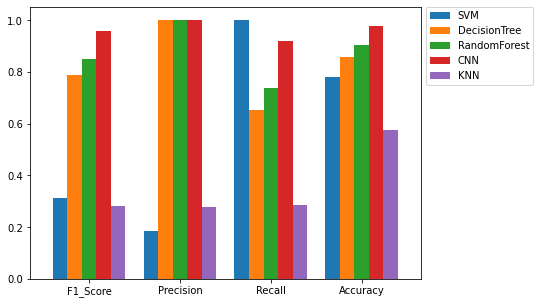

In [34]:
result = data.plot(kind='bar', rot=0, figsize=(7,5),width=0.8);
result.legend(bbox_to_anchor=(1, 1.02), loc='upper left');

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (7,) and arg 1 with shape (5,).

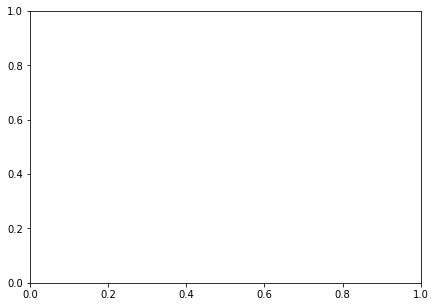

In [37]:
model = np.array(["LR","NB","SVM","DTC","RF","CNN","KNN"])
fig,ax = plt.subplots(figsize= (7,5)) 
# plt.bar(model, tp_dict.values(),width = 0.45)
# plt.bar(model, fp_dict.values(),width = 0.45)
# for bars in ax.containers:
#     ax.bar_label(bars)

X_axis = np.arange(len(model))
plt.bar(X_axis-0.5, tp_dict.values(),0.05,label="LogisticRegression")
plt.bar(X_axis-0.3, tp_dict.values(),0.05,label="NaiveBayes")
plt.bar(X_axis-0.1, tp_dict.values(),0.05,label="SVM")
plt.bar(X_axis, tp_dict.values(),0.05,label="DecisionTree")
plt.bar(X_axis+0.1, tp_dict.values(),0.05,label="RandomForest")
plt.bar(X_axis+0.3, tp_dict.values(),0.05,label="CNN")
plt.bar(X_axis+0.5, tp_dict.values(),0.05,label="KNN")
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(X_axis, model)
# plt.legend()




In [38]:
time_dict.values()

dict_values([36.1, 12.7, 15.7, 6.4, 0.6])

In [40]:
# model = np.array(["LR","NB","SVM","DTC","RF","CNN","KNN"])
# time_taken = time_dict.values()

model = np.array(["SVM","DTC","RF","CNN","KNN"])
time_taken = time_dict.values()

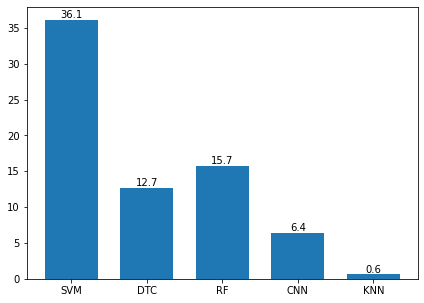

In [45]:
# fig = plt.figure(figsize = (1000000, 500000))
fig,ax = plt.subplots(figsize= (7,5)) 
plt.bar(model, time_taken,width = 0.7)
# for index, value in enumerate(time_taken):
#     plt.text(value,index,str(value))
for bars in ax.containers:
    ax.bar_label(bars)


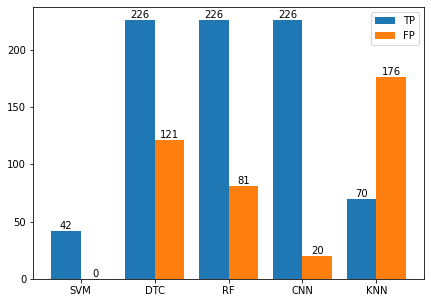

In [46]:
# model = np.array(["LR","NB","SVM","DTC","RF","CNN","KNN"])

model = np.array(["SVM","DTC","RF","CNN","KNN"])
fig,ax = plt.subplots(figsize= (7,5)) 
# plt.bar(model, tp_dict.values(),width = 0.45)
# plt.bar(model, fp_dict.values(),width = 0.45)
# for bars in ax.containers:
#     ax.bar_label(bars)

X_axis = np.arange(len(model))
plt.bar(X_axis-0.2, tp_dict.values(),0.4,label="TP")
plt.bar(X_axis+0.2, fp_dict.values(),0.4,label="FP")
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(X_axis, model)
plt.legend()

